<a href="https://colab.research.google.com/github/pszachew/Music-Genre-Classification/blob/master/GTZAN/training_10folds_stratified_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
import json

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
X = pd.read_csv('/content/gdrive/MyDrive/csv_data/GTZAN_embedded.csv',header=None)

In [4]:
y = pd.read_csv('/content/gdrive/MyDrive/csv_data/GTZAN_labels.csv', header=None)

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X_sc =pd.DataFrame(scaler.transform(X))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.3, random_state=10)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
cd /content/gdrive/MyDrive/models/GTZAN/LogisticRegression

/content/gdrive/MyDrive/models/GTZAN/LogisticRegression


In [ ]:
kf10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
mod_lg = LogisticRegression(max_iter=10000)

In [ ]:
i=1
for x_train_idx, x_test_idx in kf10.split(X_sc, y):
  X_train = X_sc.iloc[x_train_idx]
  X_test = X_sc.iloc[x_test_idx]
  y_train = y.iloc[x_train_idx]
  y_test = y.iloc[x_test_idx]
  mod_lg.fit(X_train, np.array(y_train).flatten())
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, mod_lg.predict(X_test))}")
  #joblib.dump(mod_lg, "log_reg"+str(i)+".sav")
  i=i+1

Accuracy for the fold no. 1 on the test set: 0.86
Accuracy for the fold no. 2 on the test set: 0.9
Accuracy for the fold no. 3 on the test set: 0.85
Accuracy for the fold no. 4 on the test set: 0.85
Accuracy for the fold no. 5 on the test set: 0.89
Accuracy for the fold no. 6 on the test set: 0.88
Accuracy for the fold no. 7 on the test set: 0.89
Accuracy for the fold no. 8 on the test set: 0.88
Accuracy for the fold no. 9 on the test set: 0.84
Accuracy for the fold no. 10 on the test set: 0.8787878787878788


## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
cd /content/gdrive/MyDrive/models/GTZAN/KNN

/content/gdrive/MyDrive/models/GTZAN/KNN


In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 4)

In [ ]:
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)
mod_knn = KNeighborsClassifier(n_neighbors=4)
i=1
for x_train_idx, x_test_idx in kf10.split(X_sc):
  X_train = X_sc.iloc[x_train_idx]
  X_test = X_sc.iloc[x_test_idx]
  y_train = y.iloc[x_train_idx]
  y_test = y.iloc[x_test_idx]
  mod_knn.fit(X_train, np.array(y_train).flatten())
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, mod_knn.predict(X_test))}")
  joblib.dump(mod_lg, "knn"+str(i)+".sav")
  i=i+1

Accuracy for the fold no. 1 on the test set: 0.78
Accuracy for the fold no. 2 on the test set: 0.86
Accuracy for the fold no. 3 on the test set: 0.76
Accuracy for the fold no. 4 on the test set: 0.81
Accuracy for the fold no. 5 on the test set: 0.81
Accuracy for the fold no. 6 on the test set: 0.81
Accuracy for the fold no. 7 on the test set: 0.87
Accuracy for the fold no. 8 on the test set: 0.75
Accuracy for the fold no. 9 on the test set: 0.75
Accuracy for the fold no. 10 on the test set: 0.7878787878787878


### **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
cd /content/gdrive/MyDrive/models/GTZAN/SVM

/content/gdrive/MyDrive/models/GTZAN/SVM


In [ ]:
i=1
for x_train_idx, x_test_idx in kf10.split(X_sc):
  X_train = X_sc.iloc[x_train_idx]
  X_test = X_sc.iloc[x_test_idx]
  y_train = y.iloc[x_train_idx]
  y_test = y.iloc[x_test_idx]
  mod_svm = SVC(kernel='linear')
  mod_svm.fit(X_train, np.array(y_train).flatten())
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, mod_svm.predict(X_test))}")
  joblib.dump(mod_svm, "svm"+str(i)+".sav")
  i=i+1

Accuracy for the fold no. 1 on the test set: 0.85
Accuracy for the fold no. 2 on the test set: 0.88
Accuracy for the fold no. 3 on the test set: 0.88
Accuracy for the fold no. 4 on the test set: 0.89
Accuracy for the fold no. 5 on the test set: 0.88
Accuracy for the fold no. 6 on the test set: 0.88
Accuracy for the fold no. 7 on the test set: 0.92
Accuracy for the fold no. 8 on the test set: 0.84
Accuracy for the fold no. 9 on the test set: 0.9
Accuracy for the fold no. 10 on the test set: 0.8787878787878788


### **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
cd /content/gdrive/MyDrive/models/GTZAN/RFC

/content/gdrive/MyDrive/models/GTZAN/RFC


In [ ]:
i=1
for train_idx, test_idx in kf10.split(X_sc):
  X_train = X_sc.iloc[train_idx]
  X_test = X_sc.iloc[test_idx]
  y_train = y.iloc[train_idx]
  y_test = y.iloc[test_idx]
  rfc = RandomForestClassifier(n_estimators=400)
  rfc.fit(X_train, np.array(y_train).flatten())
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, rfc.predict(X_test))}")
  joblib.dump(rfc, "rfc"+str(i)+".sav")
  i = i+1


Accuracy for the fold no. 1 on the test set: 0.74
Accuracy for the fold no. 2 on the test set: 0.82
Accuracy for the fold no. 3 on the test set: 0.79
Accuracy for the fold no. 4 on the test set: 0.78
Accuracy for the fold no. 5 on the test set: 0.74
Accuracy for the fold no. 6 on the test set: 0.77
Accuracy for the fold no. 7 on the test set: 0.8
Accuracy for the fold no. 8 on the test set: 0.72
Accuracy for the fold no. 9 on the test set: 0.81
Accuracy for the fold no. 10 on the test set: 0.7676767676767676


### **Gradient Boosting**

In [ ]:
import xgboost as xgb

In [ ]:
kf10 = KFold(n_splits=10, shuffle=True)

In [ ]:
cd /content/gdrive/MyDrive/models/GTZAN/Gradient Boosting

/content/gdrive/MyDrive/models/GTZAN/Gradient Boosting


In [ ]:
for train_idx, test_idx in kf10.split(X_sc):
  X_train = X_sc.iloc[train_idx]
  X_test = X_sc.iloc[test_idx]
  y_train = y.iloc[train_idx]
  y_test = y.iloc[test_idx]
  xgbc = xgb.XGBClassifier(max_depths=5, learning_rate=0.1)
  xgbc.fit(X_train, np.array(y_train).flatten())
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, xgbc.predict(X_test))}")
  joblib.dump(xgbc, "xgbc"+str(i)+".sav")
  i = i+1

Accuracy for the fold no. 11 on the test set: 0.75
Accuracy for the fold no. 12 on the test set: 0.79
Accuracy for the fold no. 13 on the test set: 0.77
Accuracy for the fold no. 14 on the test set: 0.81
Accuracy for the fold no. 15 on the test set: 0.75
Accuracy for the fold no. 16 on the test set: 0.75
Accuracy for the fold no. 17 on the test set: 0.75
Accuracy for the fold no. 18 on the test set: 0.74
Accuracy for the fold no. 19 on the test set: 0.74
Accuracy for the fold no. 20 on the test set: 0.7070707070707071


### **Neural Network(MLP)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import add, Dense
import tensorflow as tf

In [ ]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [ ]:
y_train_cat = pd.get_dummies(y_train)

In [ ]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=30720, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 1024)              31458304  
                                                                 
 dense_36 (Dense)            (None, 512)               524800    
                                                                 
 dense_37 (Dense)            (None, 512)               262656    
                                                                 
 dense_38 (Dense)            (None, 10)                5130      
                                                                 
Total params: 32,250,890
Trainable params: 32,250,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, 
                    y_train_cat, 
                    epochs=30,
                    verbose=1,
                    batch_size = 200,
                    validation_split = 0.2
                   )


Epoch 1/30
3/3 [==============================] - 2s 673ms/step - loss: 7.3790 - accuracy: 0.2773 - val_loss: 8.6323 - val_accuracy: 0.4714
Epoch 2/30
3/3 [==============================] - 2s 573ms/step - loss: 4.4831 - accuracy: 0.6565 - val_loss: 2.9615 - val_accuracy: 0.7143
Epoch 3/30
3/3 [==============================] - 2s 576ms/step - loss: 1.5617 - accuracy: 0.8086 - val_loss: 1.8880 - val_accuracy: 0.7071
Epoch 4/30
3/3 [==============================] - 2s 569ms/step - loss: 0.6167 - accuracy: 0.9141 - val_loss: 1.7836 - val_accuracy: 0.7500
Epoch 5/30
3/3 [==============================] - 2s 574ms/step - loss: 0.4345 - accuracy: 0.9463 - val_loss: 1.4338 - val_accuracy: 0.8143
Epoch 6/30
3/3 [==============================] - 2s 566ms/step - loss: 0.1619 - accuracy: 0.9732 - val_loss: 1.7183 - val_accuracy: 0.7857
Epoch 7/30
3/3 [==============================] - 2s 570ms/step - loss: 0.0882 - accuracy: 0.9714 - val_loss: 1.4973 - val_accuracy: 0.8214
Epoch 8/30
3/3 [====

In [ ]:
predicted = model.predict(X_test)
y_pre = []
for arr in predicted:
  y_pre.append(genres[arr.argmax()])

In [ ]:
print(accuracy_score(y_test, y_pre))

0.8033333333333333


In [ ]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

       blues       0.74      0.91      0.82        35
   classical       0.89      1.00      0.94        33
     country       0.84      0.59      0.70        27
       disco       1.00      0.56      0.72        34
      hiphop       0.71      1.00      0.83        24
        jazz       0.92      0.94      0.93        35
       metal       0.97      0.97      0.97        31
         pop       0.57      0.88      0.70        26
      reggae       0.96      0.73      0.83        30
        rock       0.50      0.36      0.42        25

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.78       300
weighted avg       0.82      0.80      0.80       300



In [ ]:
cm = confusion_matrix(y_test, y_pre, labels=genres)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = genres)

In [ ]:
cm = pd.DataFrame(cm, index=genres, columns=genres)

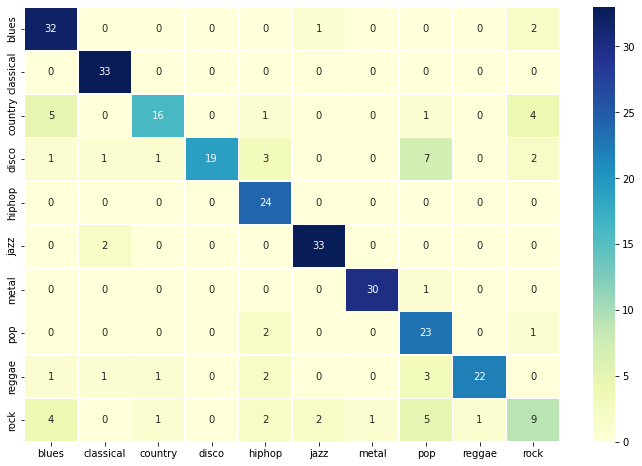

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

## **MLPClassifier**

In [7]:
from sklearn.neural_network import MLPClassifier

In [25]:
MLPclass = MLPClassifier(hidden_layer_sizes=(4096,4096,4096), random_state=8, activation='relu', solver="adam", learning_rate_init=0.001, learning_rate='constant', beta_1=0.9)

In [26]:
MLPclass.fit(X_train, y_train)
y_pred = MLPclass.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
accuracy_score(y_test, y_pred)  

0.82